In [5]:
import os
import glob
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import seaborn as sns

import letkf_forecasting.letkf_io as letkf_io
import letkf_forecasting.analyse_results as analyse_results

cpal = sns.color_palette()
sns.set_style('whitegrid')
sns.set_context('paper', font_scale=1.0, rc={'lines.linewidth':1.0, 'lines.markersize':7})
dpi = 300

%matplotlib inline

In [63]:
search_paths = [
    '/a2/uaren/travis/results/',
    '/a2/uaren/travis/results_opt/'
]

In [105]:
def search_for_run(run, search_paths):
    these_paths = list(
        (os.path.join(apath, f'{year:04}/{month:02}/{day:02}/{run}'))
         for apath in search_paths)
    to_return = None
    for count, apath in enumerate(these_paths):
        try:
            to_return = letkf_io.find_run_folder(apath)
        except Exception:
            continue
    return to_return

In [106]:
def plot_stat(year, month, day, runs, search_paths, stat):
    stat_dfs = []
    for run in runs:
        apath = search_for_run(run, search_paths)
        apath = os.path.join(apath, f'{stat}.h5')
        print(apath)
        stat_dfs.append(pd.read_hdf(apath))
    y_max = np.max(list(map(lambda x: x.max().max(), stat_dfs)))
    for hor in [15, 30, 45, 60]:
        plt.figure(dpi=dpi)
        for stat in stat_dfs:
            stat[hor].dropna().plot(linestyle='--', marker='o')
        (stat[hor]*np.nan).plot(color='b')
        
        plt.legend(runs)
        plt.ylim([0, y_max])
        plt.ylabel('RMSE (CI)')
        plt.title(f'{hor} minute rmse: {month}/{day}')

In [118]:
this = analyse_results.error_stats_one_day(year, month, day, ['persistence'], '/a2/uaren/travis/')

persistence


In [139]:
year = 2014
month = 5
day = 29
runs = ['owp_002_1p5_020_2p0_050_0p25', 'wrf_no_div', 'persistence']

/a2/uaren/travis/results_opt/2014/05/29/owp_002_1p5_020_2p0_050_0p25/rmse.h5
/a2/uaren/travis/results/2014/05/29/wrf_no_div_000/rmse.h5
/a2/uaren/travis/results/2014/05/29/persistence_000/rmse.h5


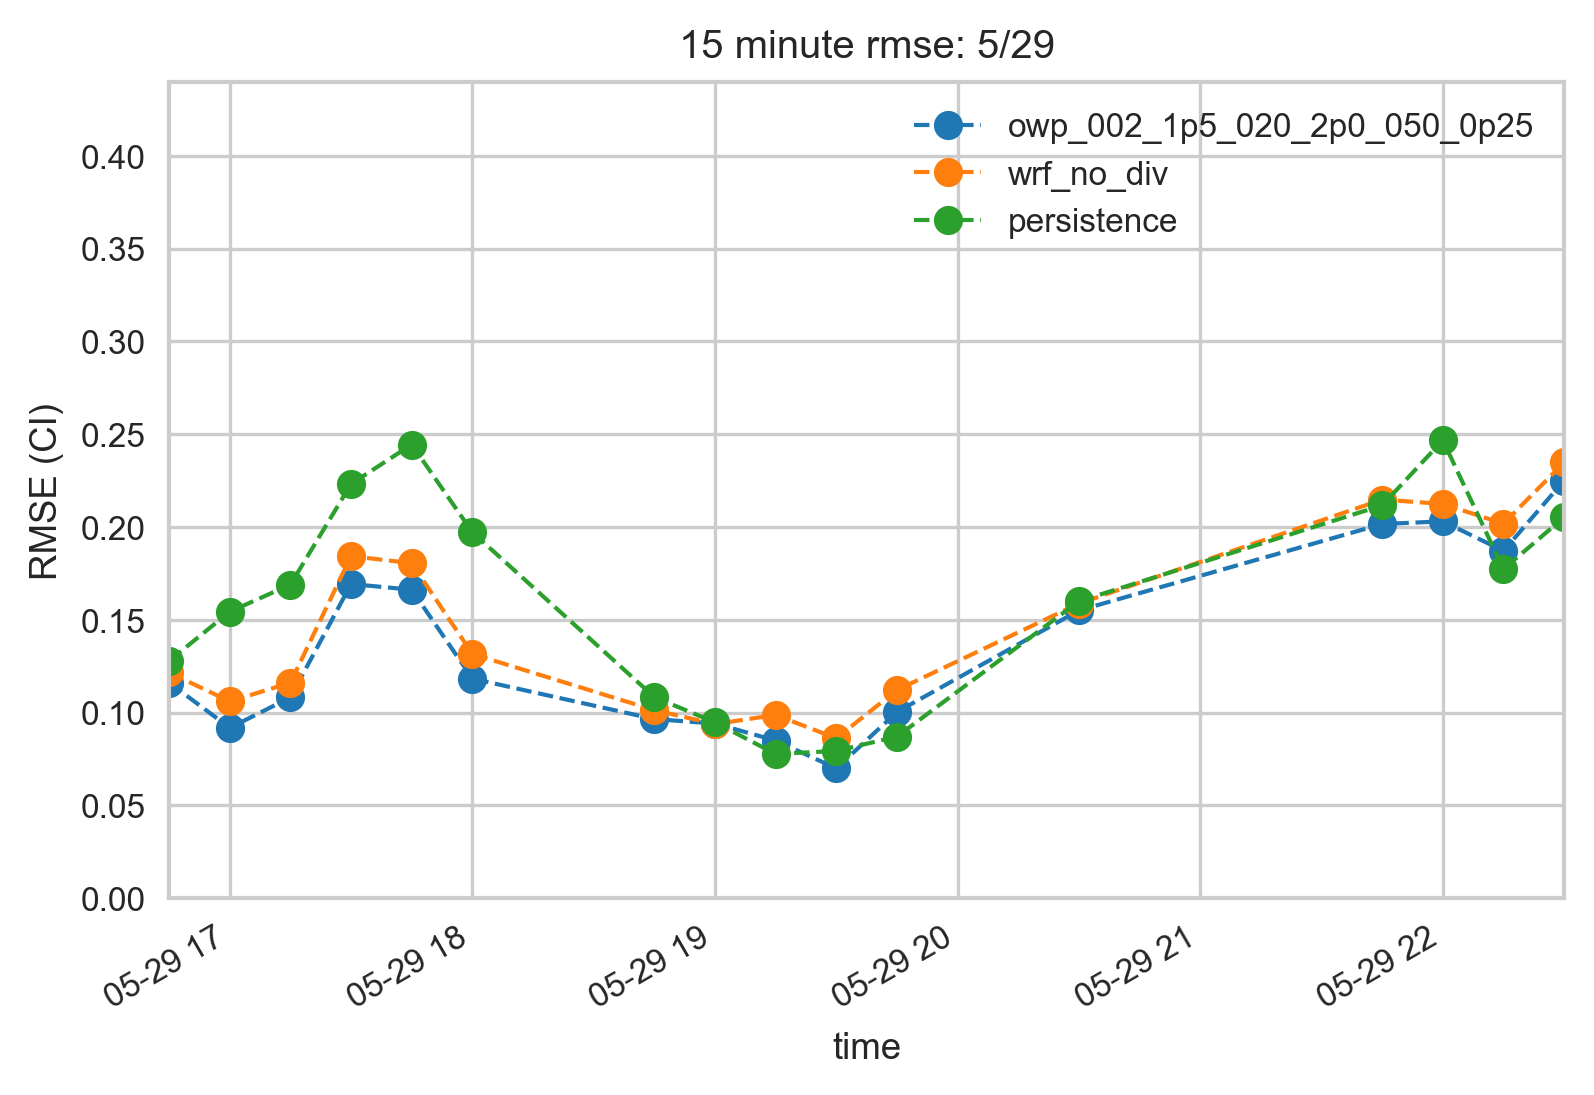

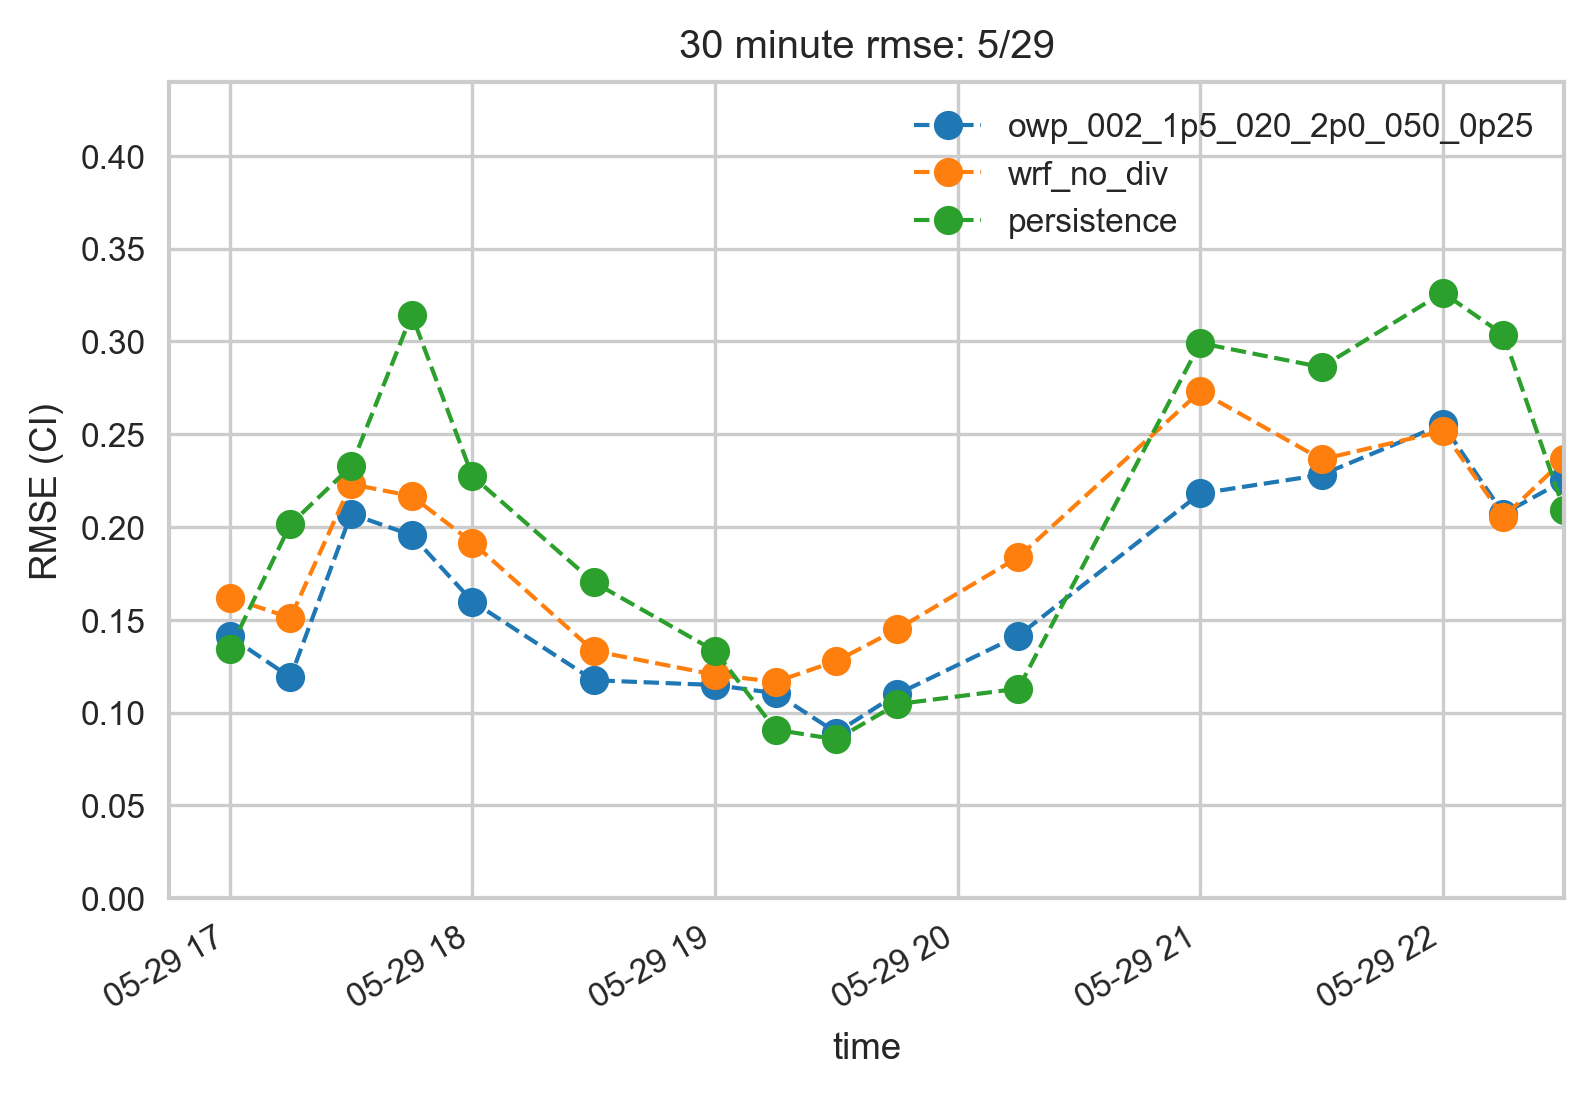

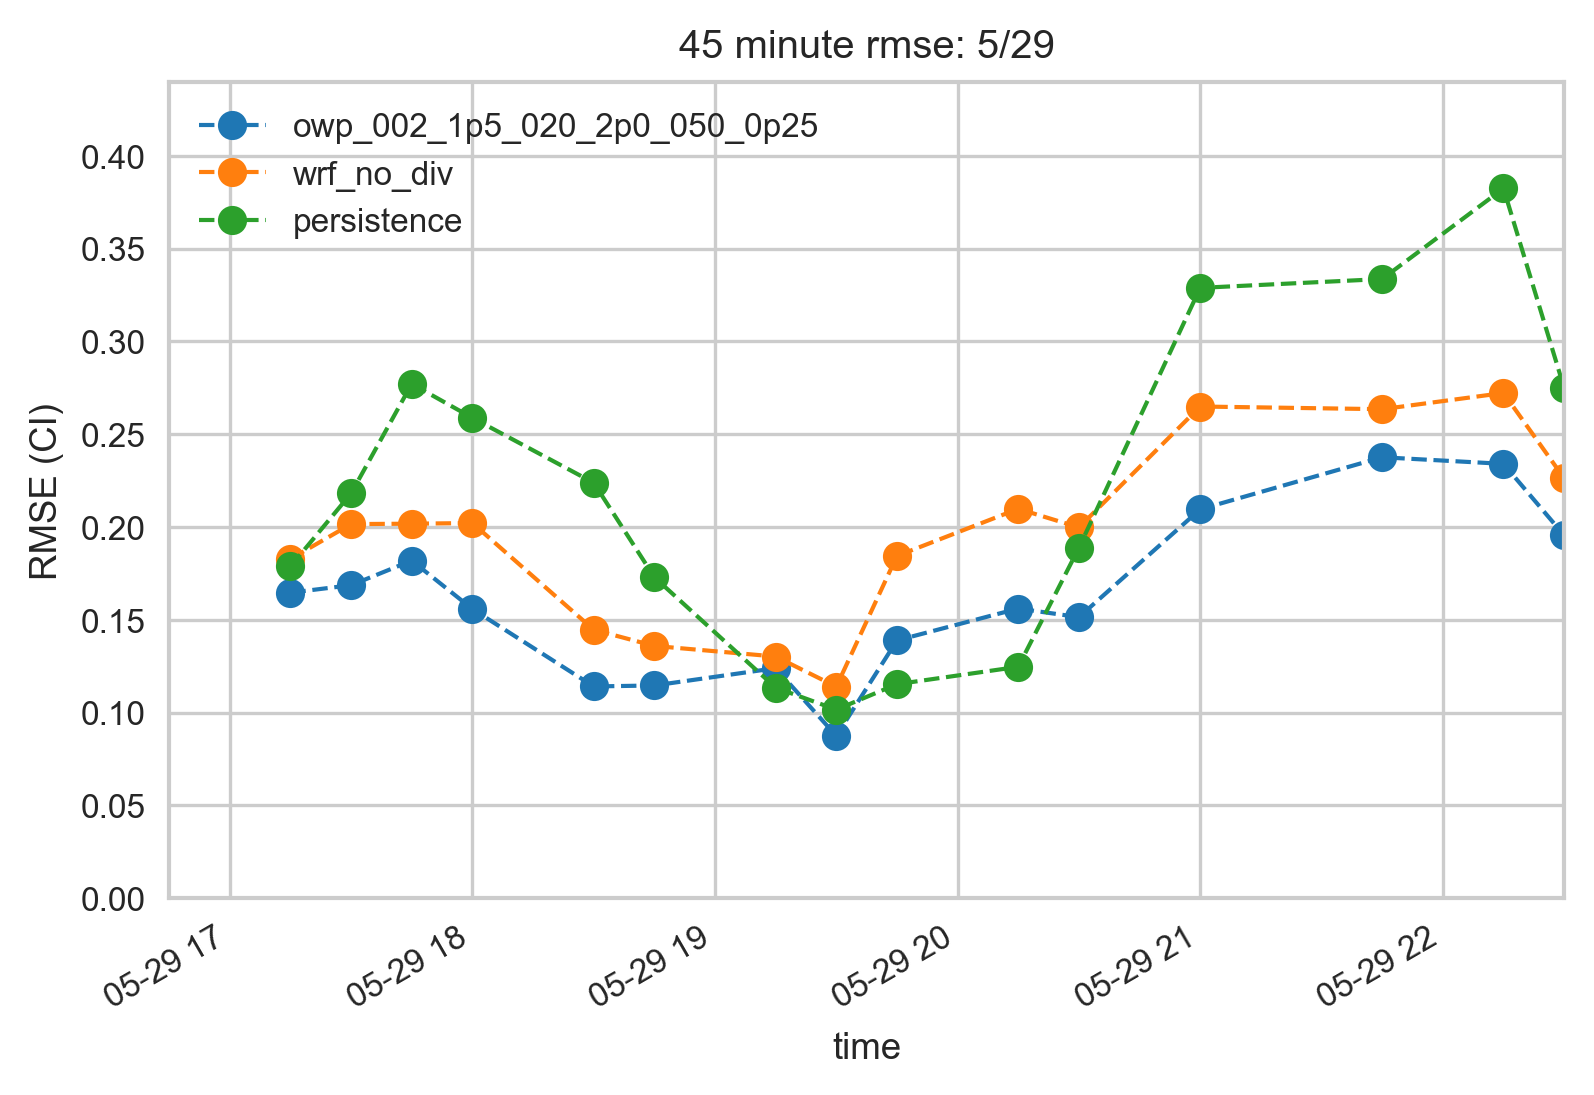

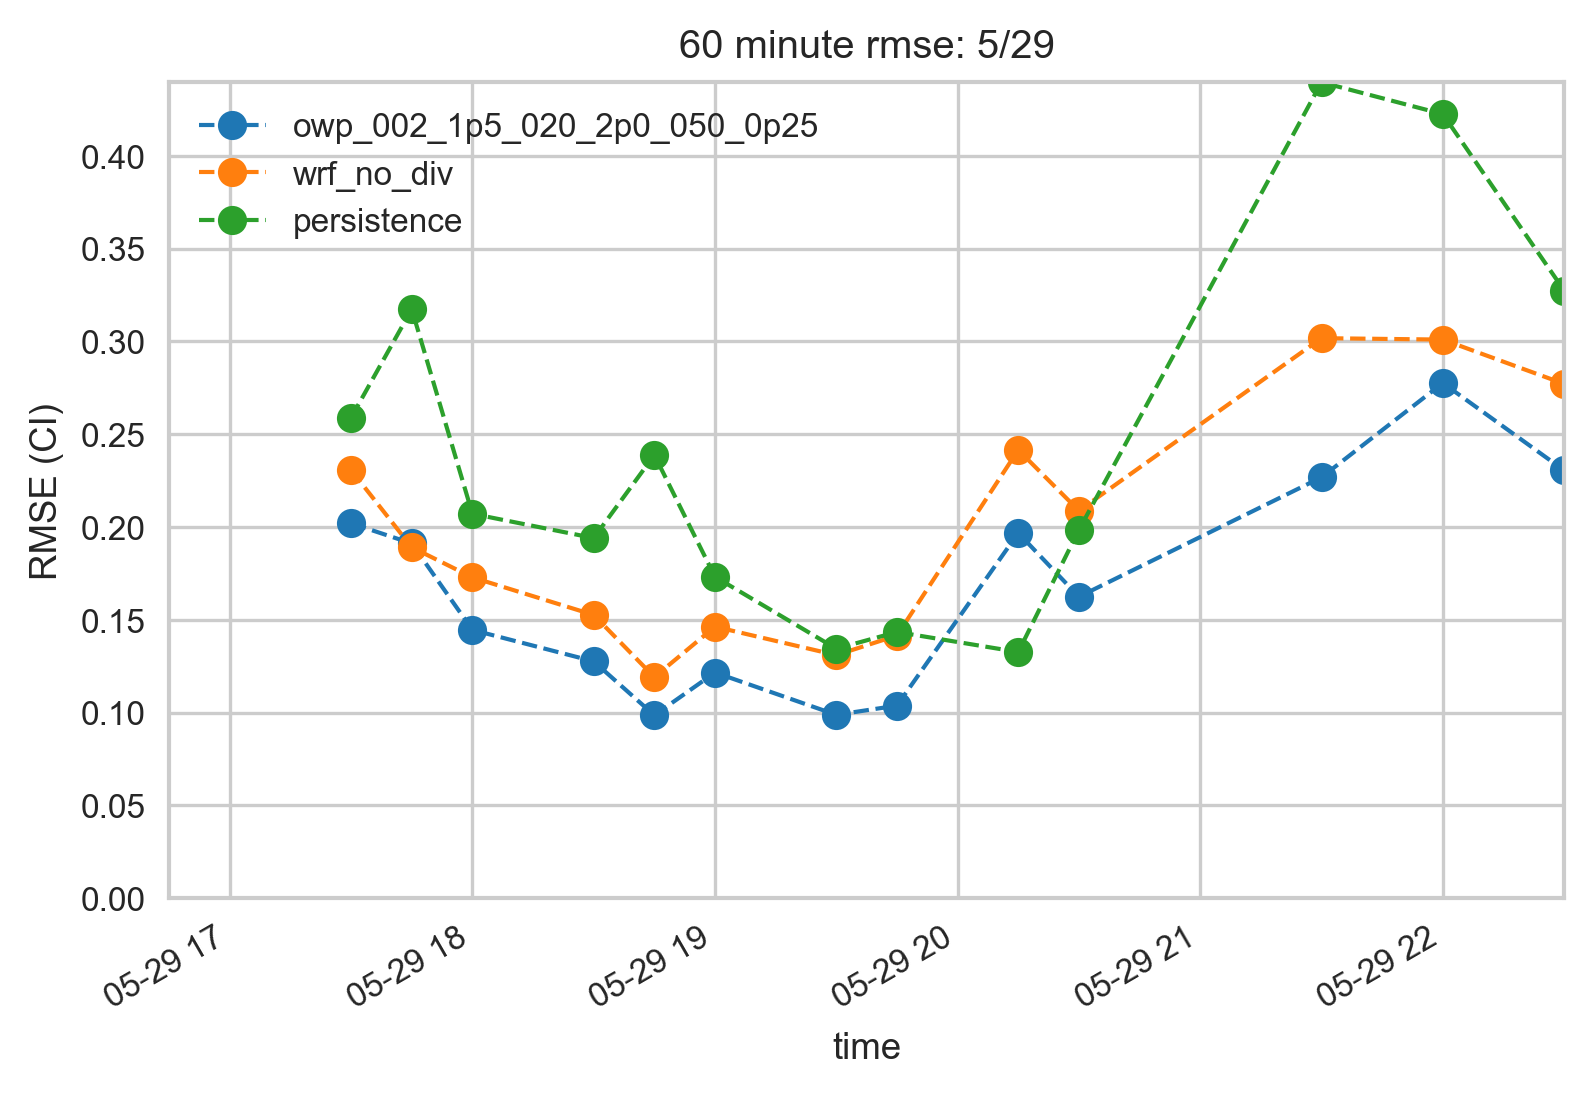

In [140]:
plot_stat(year, month, day, runs, search_paths, 'rmse')

/a2/uaren/travis/results_opt/2014/05/29/owp_002_1p5_020_2p0_050_0p25/correlation.h5
/a2/uaren/travis/results/2014/05/29/wrf_no_div_000/correlation.h5
/a2/uaren/travis/results/2014/05/29/persistence_000/correlation.h5


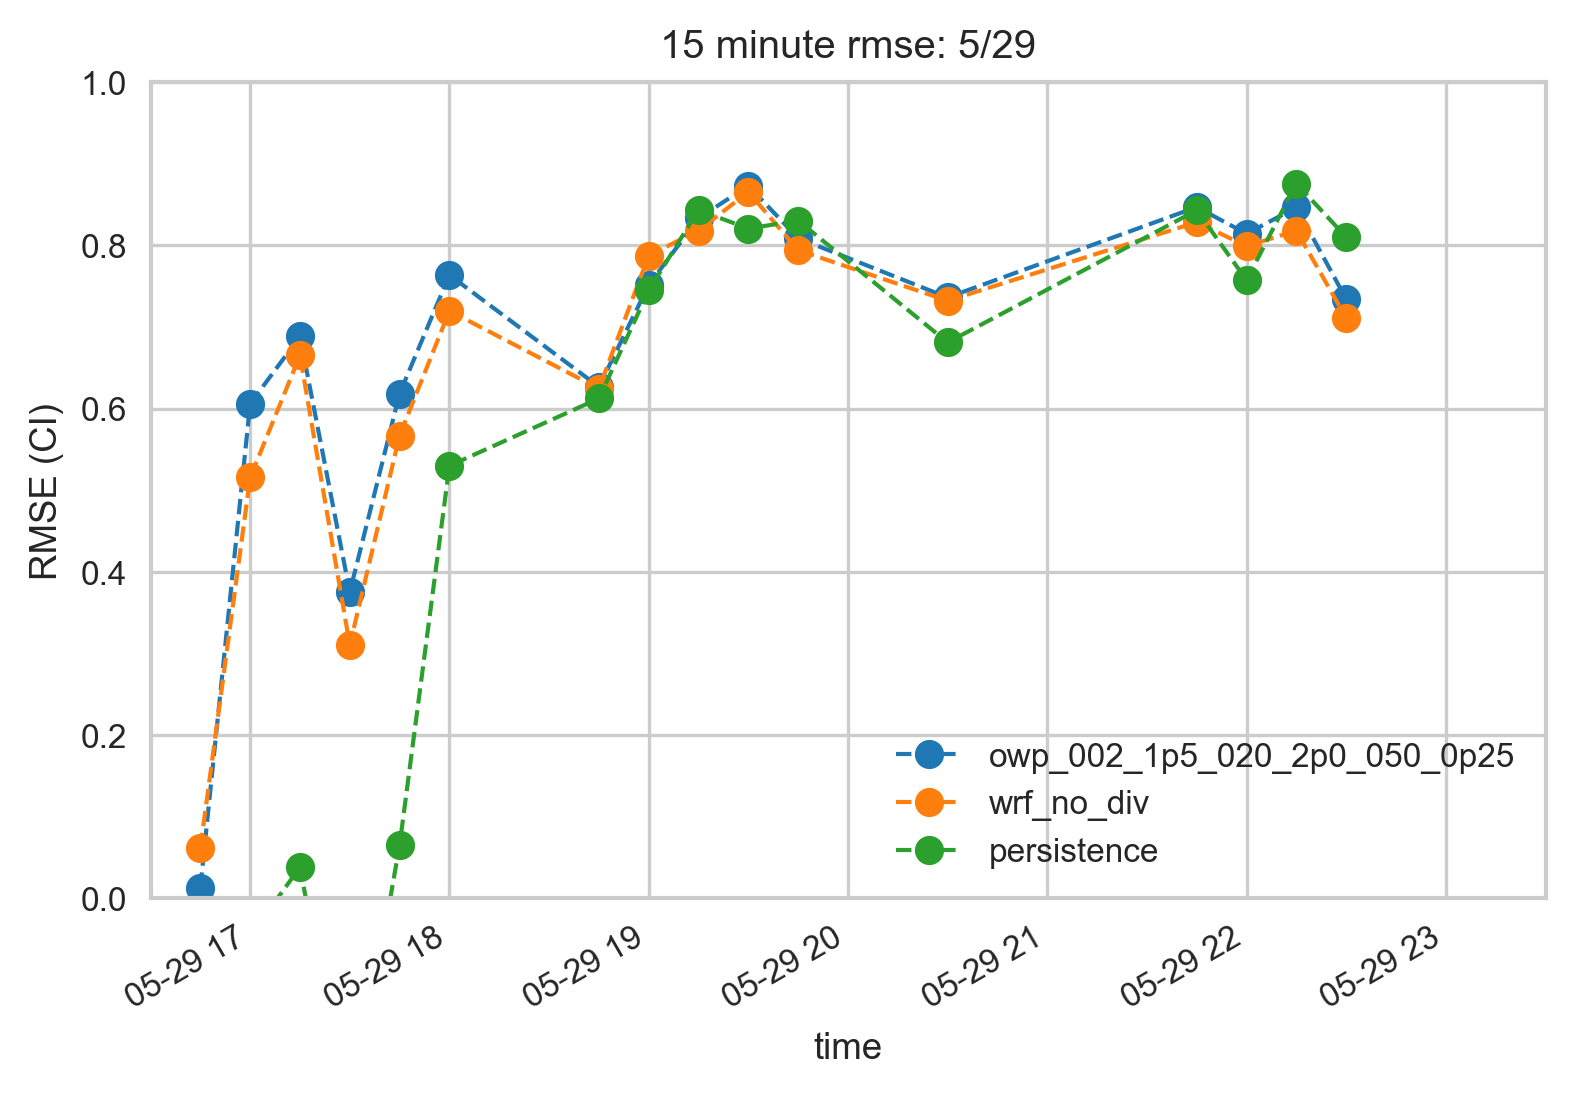

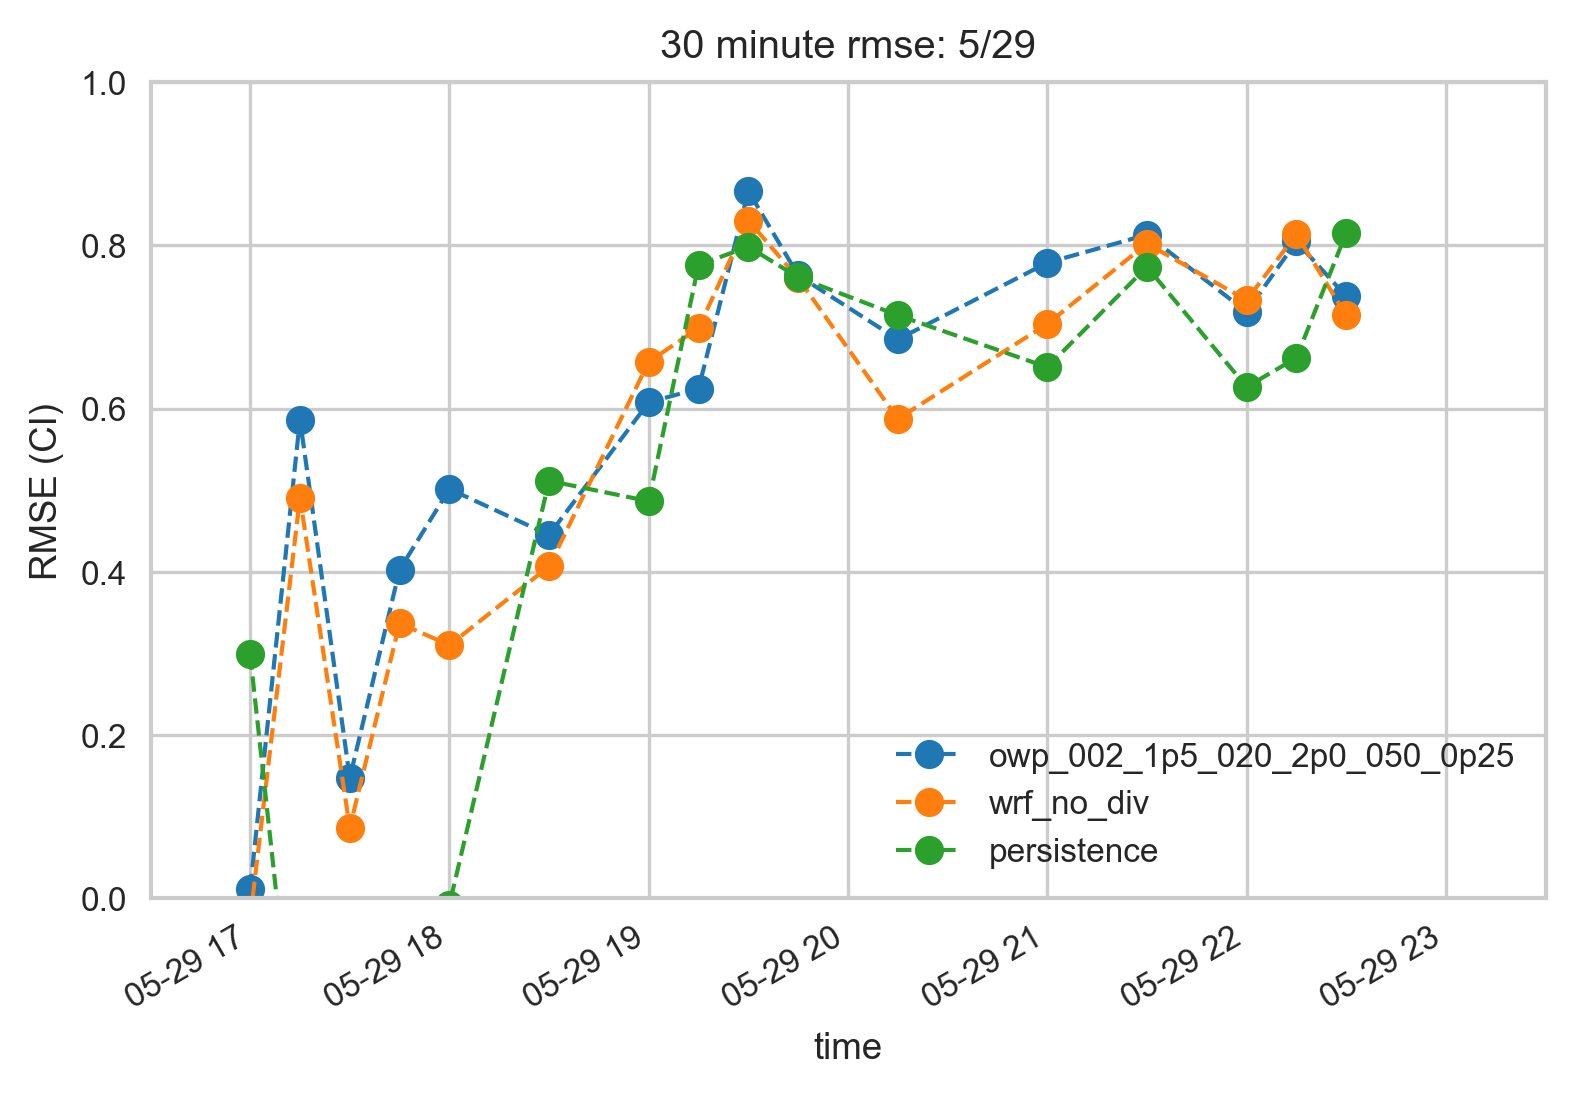

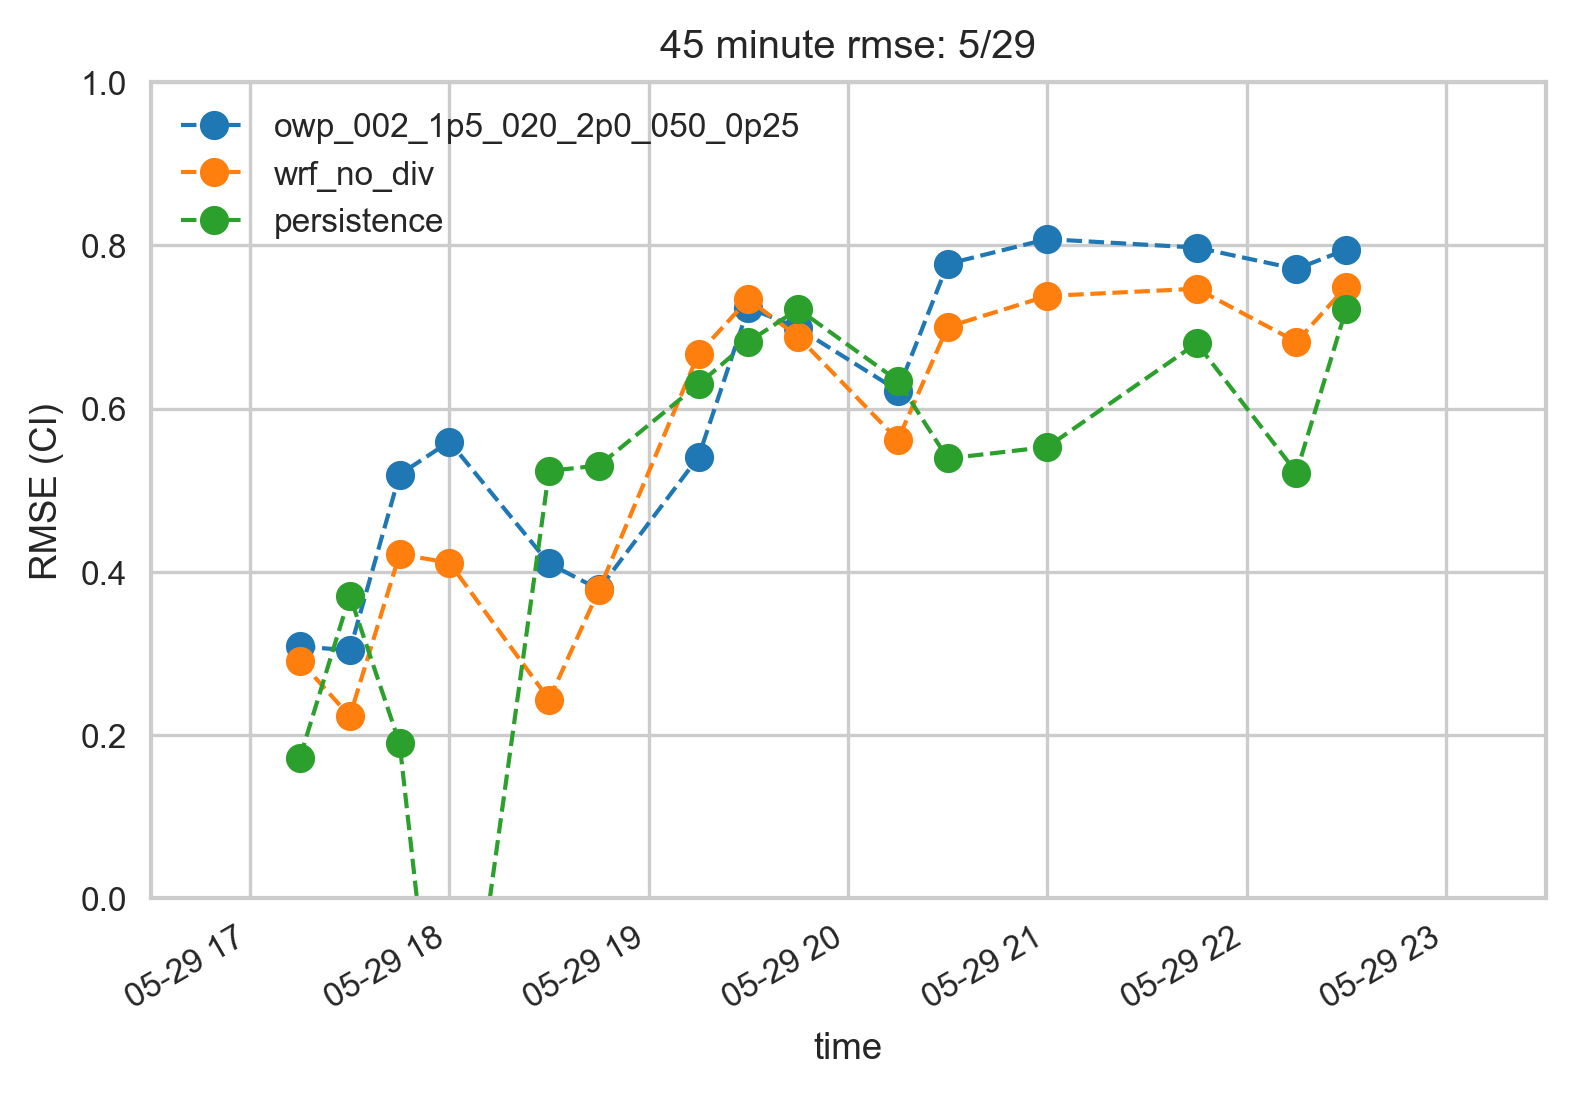

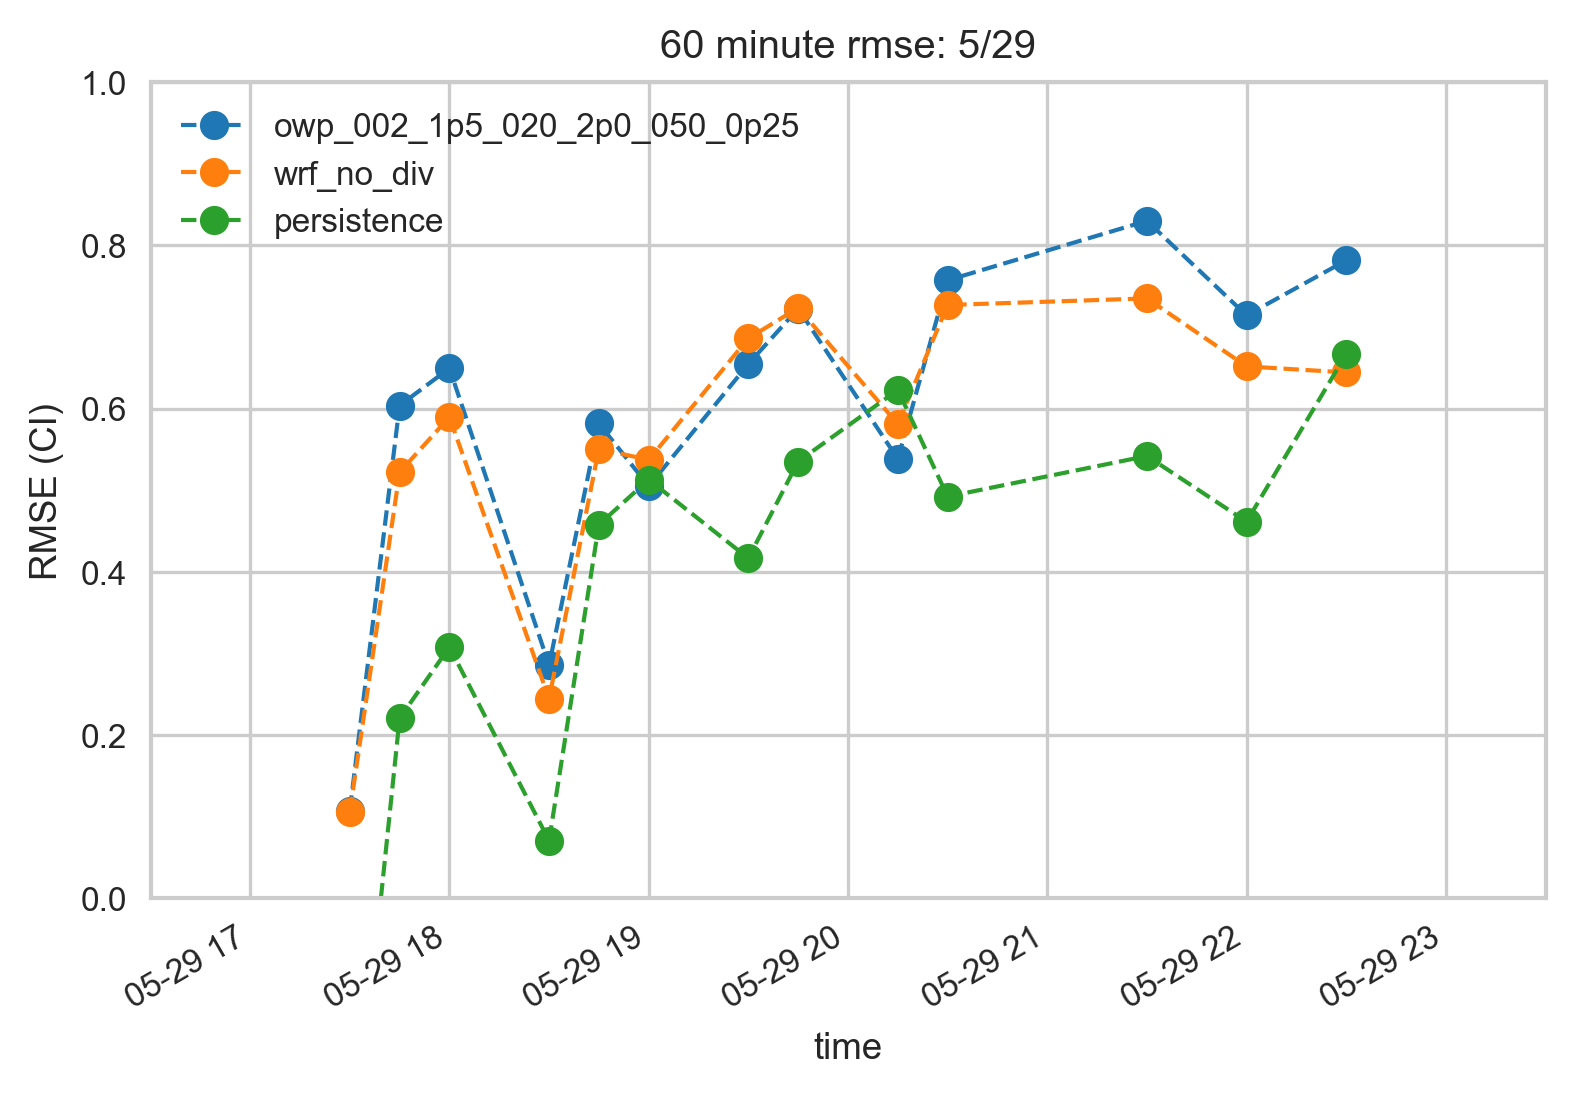

In [141]:
plot_stat(year, month, day, runs, search_paths, 'correlation')

In [142]:
year = 2014
month = 4
day = 15
runs = ['owp_002_1p5_020_2p0_050_0p25', 'wrf_no_div', 'persistence']

/a2/uaren/travis/results_opt/2014/04/15/owp_002_1p5_020_2p0_050_0p25/rmse.h5
/a2/uaren/travis/results/2014/04/15/wrf_no_div_000/rmse.h5
/a2/uaren/travis/results/2014/04/15/persistence_000/rmse.h5


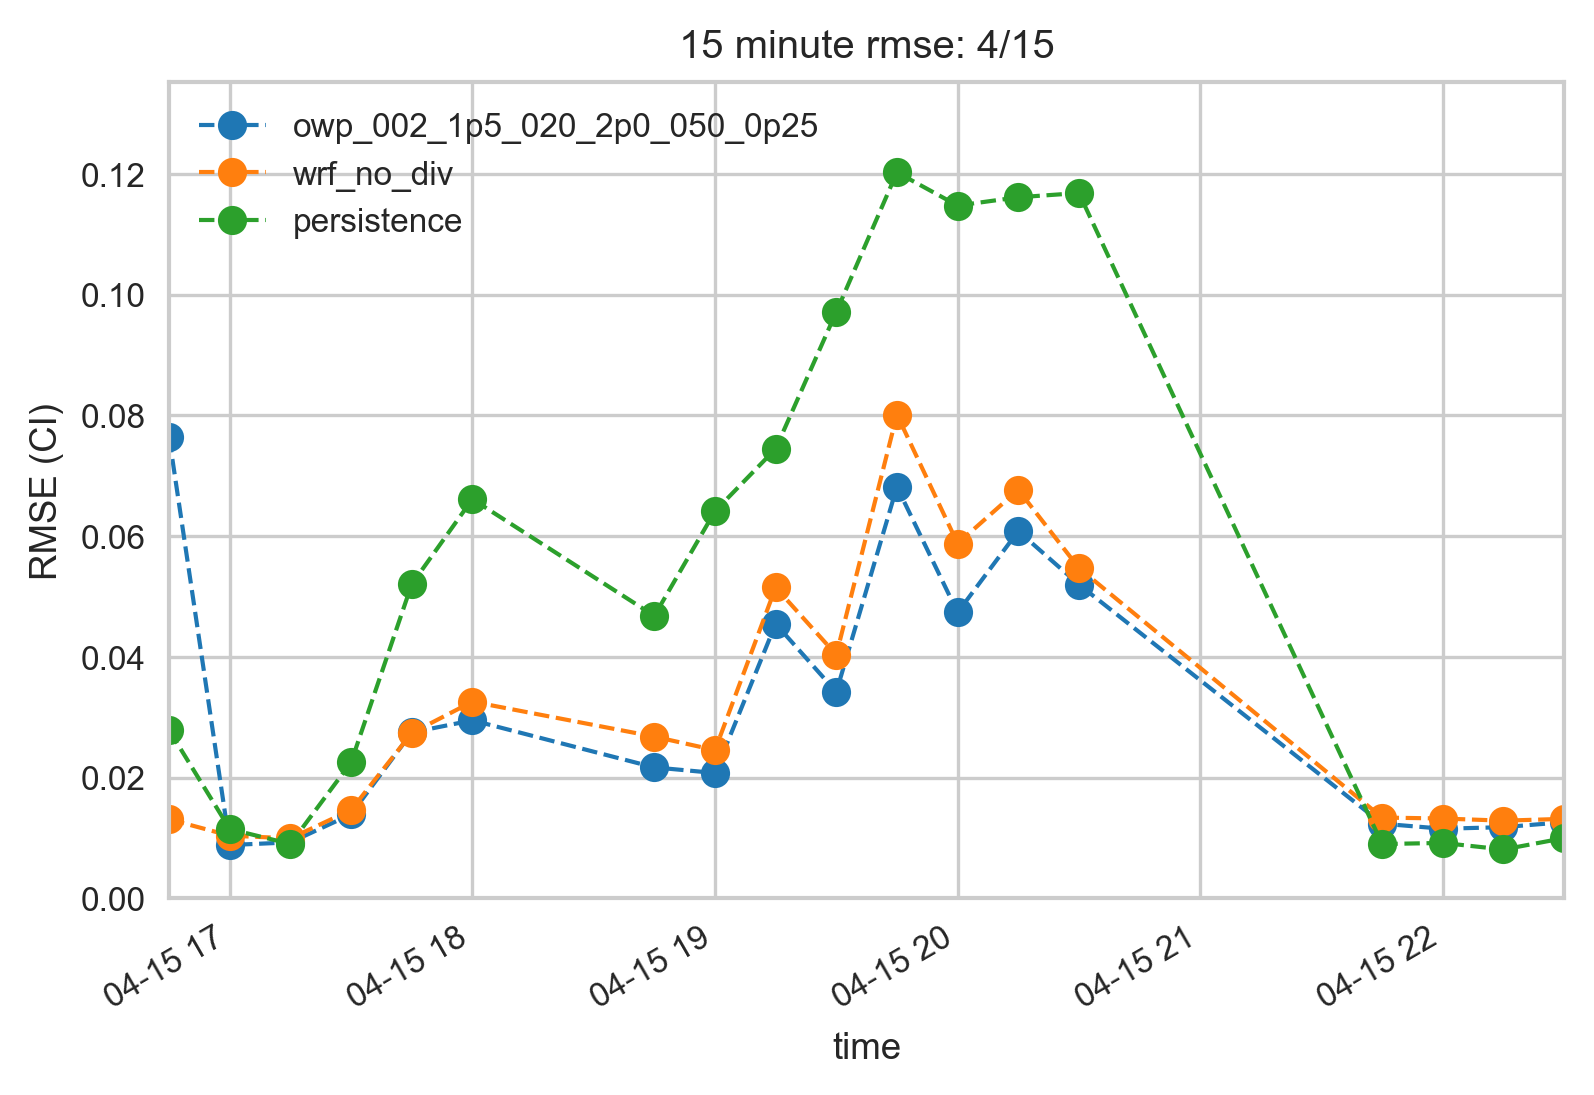

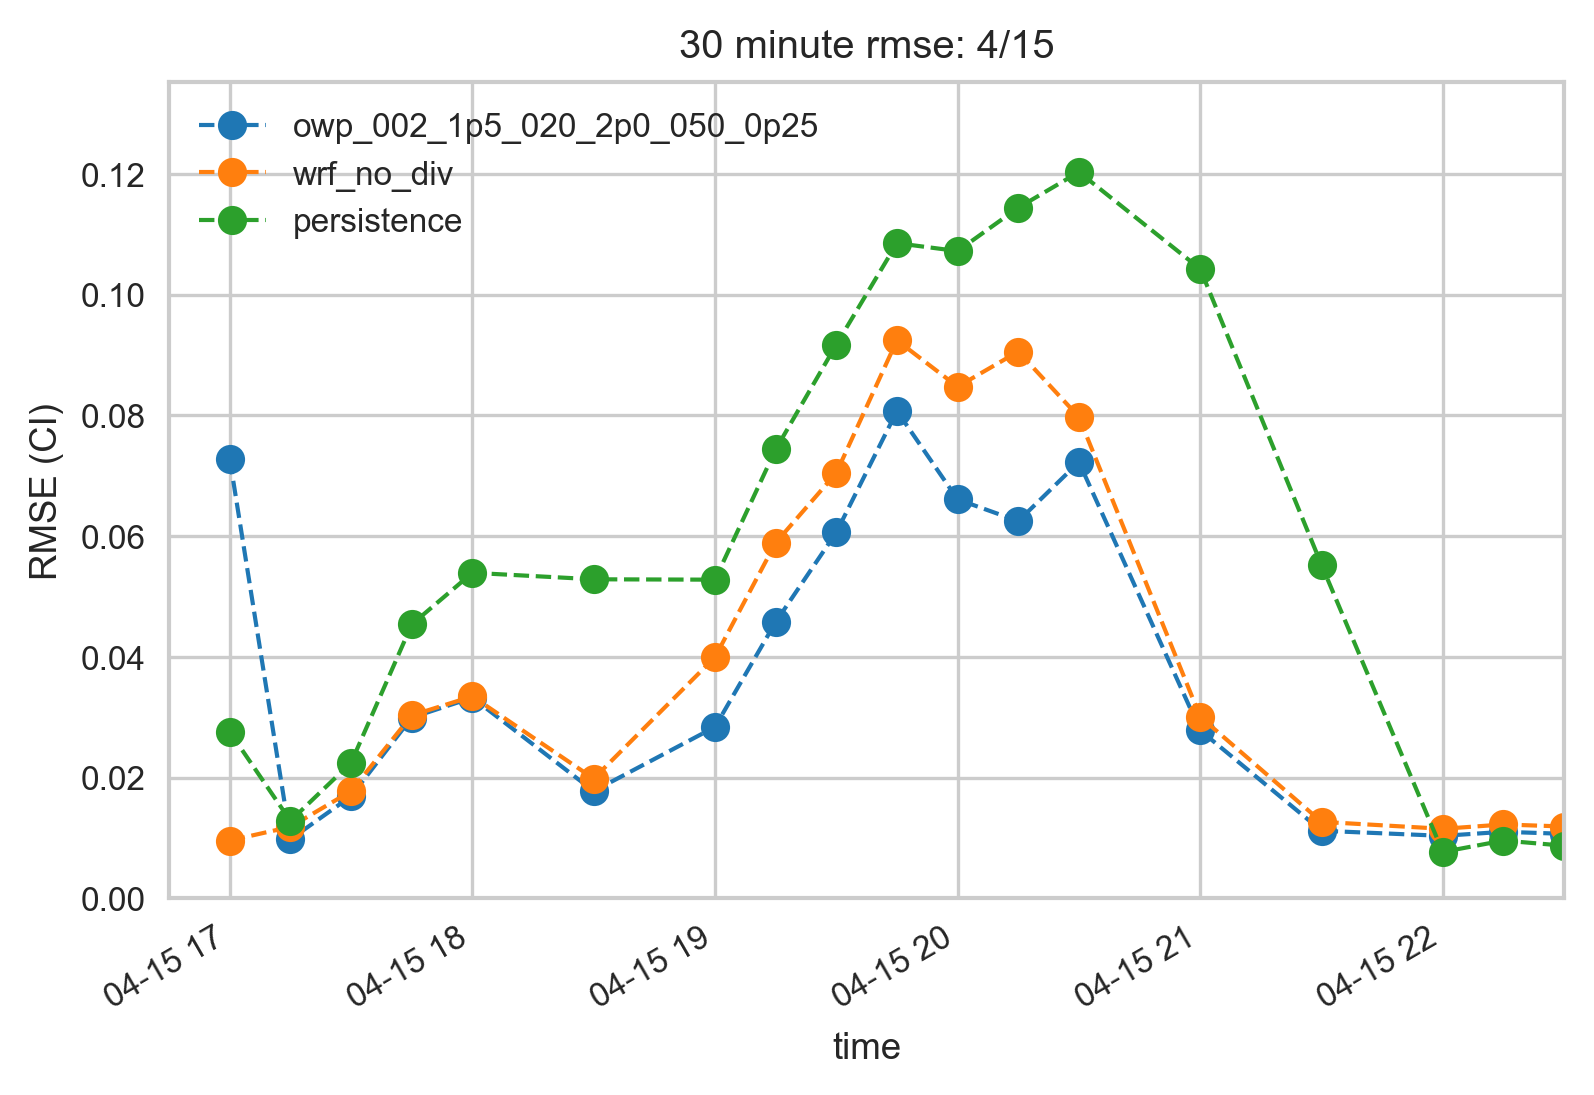

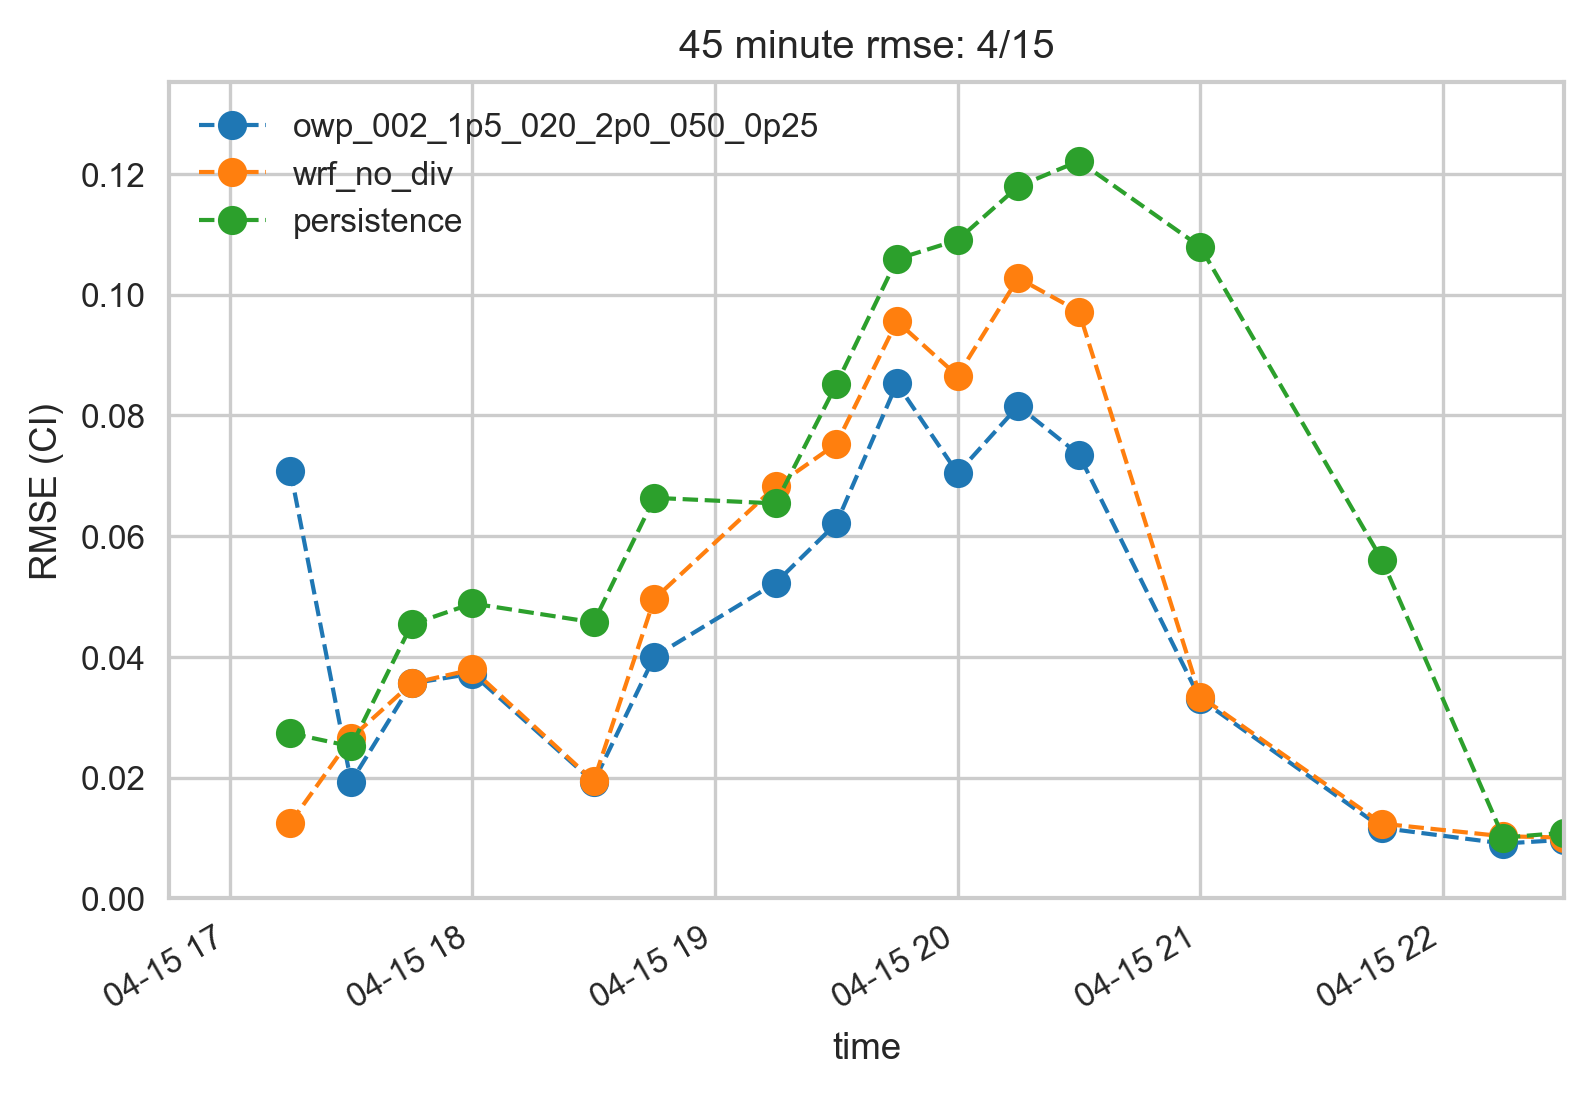

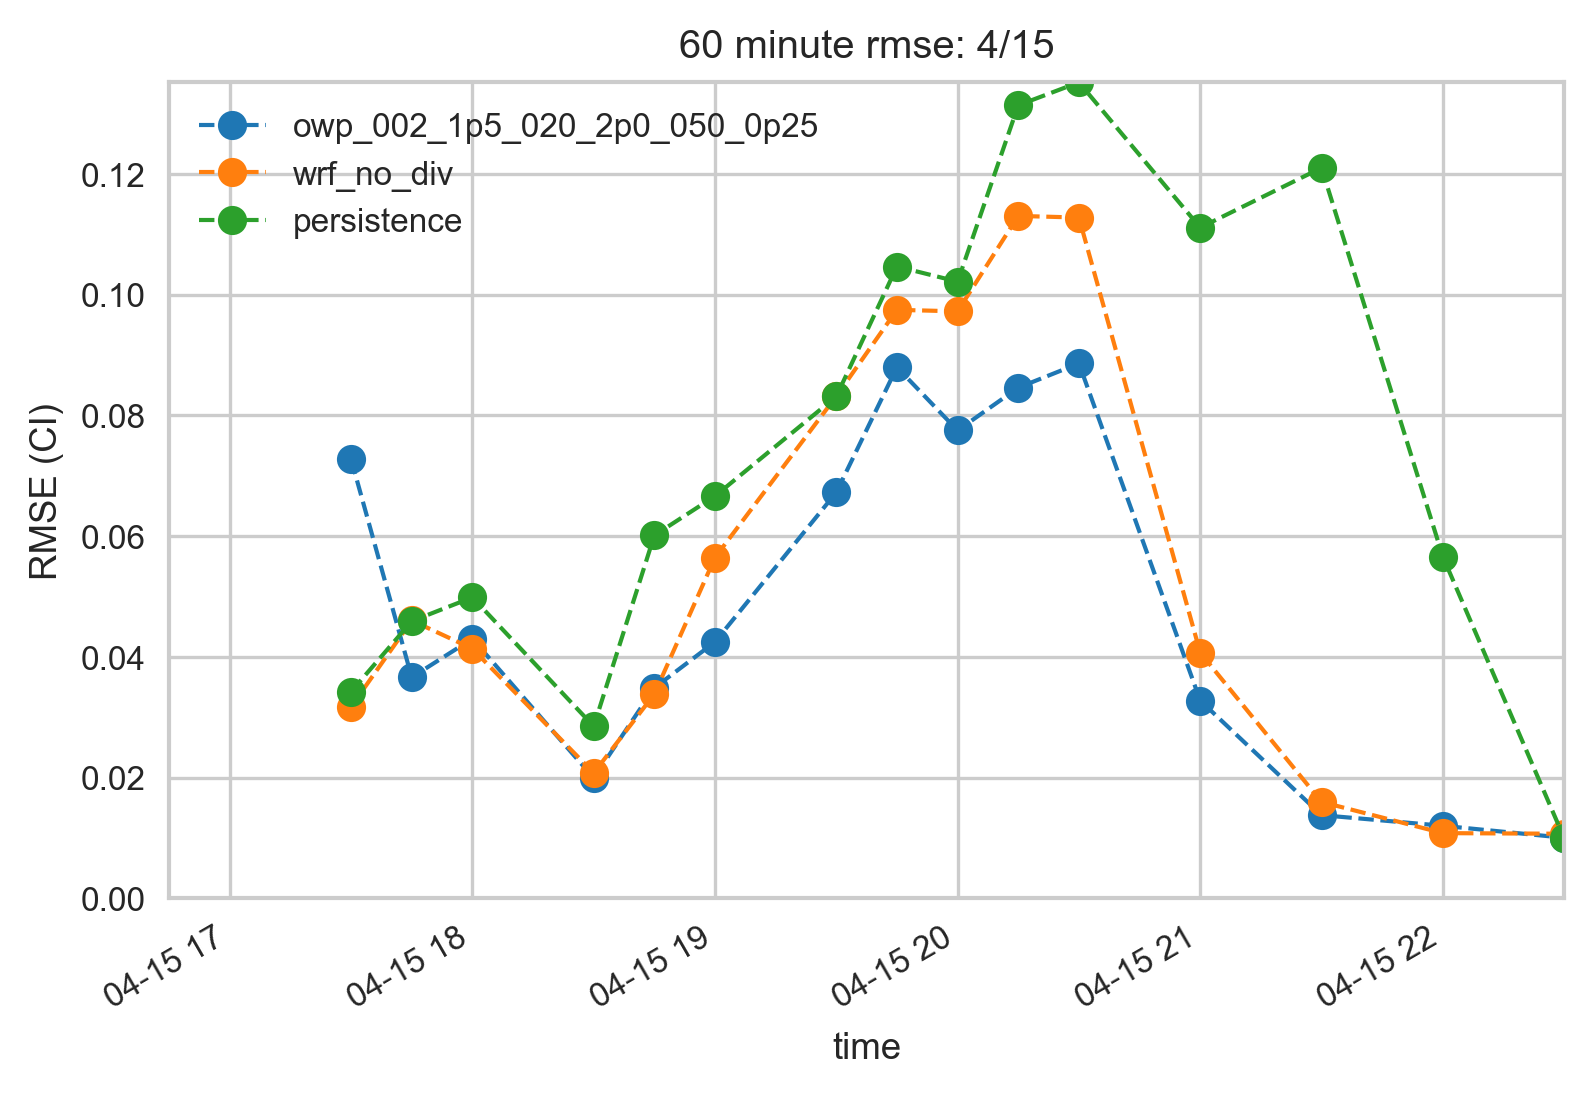

In [143]:
plot_stat(year, month, day, runs, search_paths, 'rmse')

/a2/uaren/travis/results_opt/2014/04/15/owp_002_1p5_020_2p0_050_0p25/correlation.h5
/a2/uaren/travis/results/2014/04/15/wrf_no_div_000/correlation.h5
/a2/uaren/travis/results/2014/04/15/persistence_000/correlation.h5


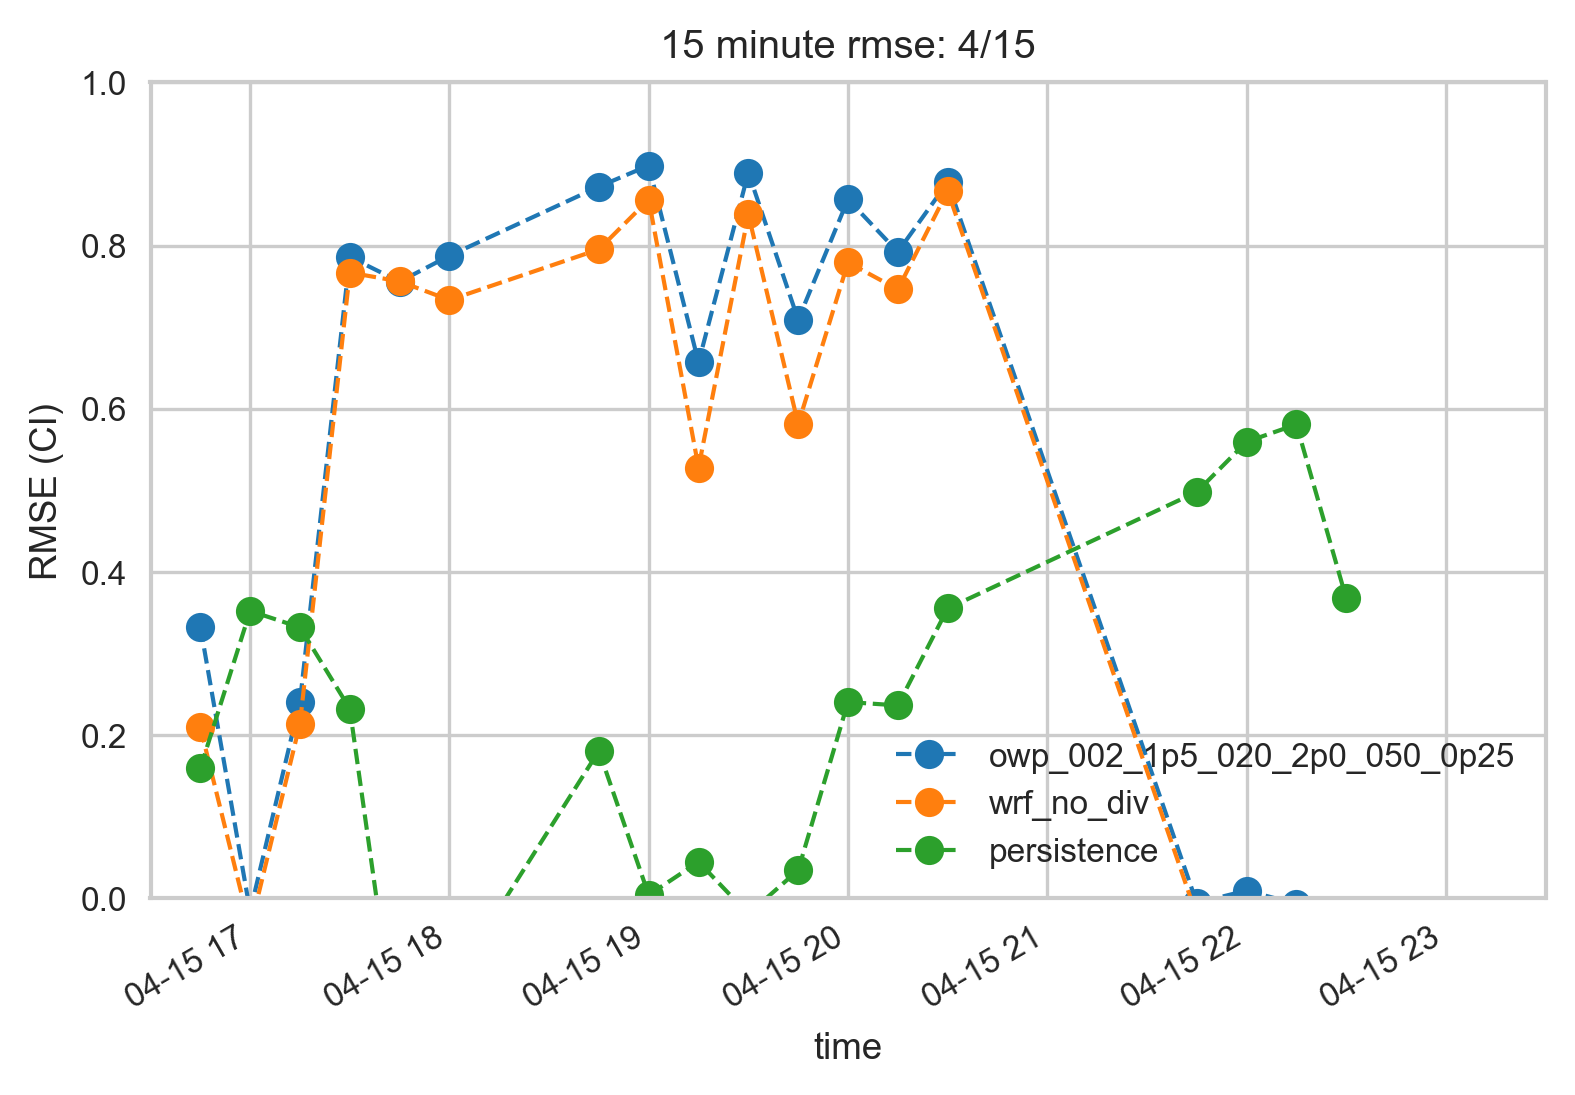

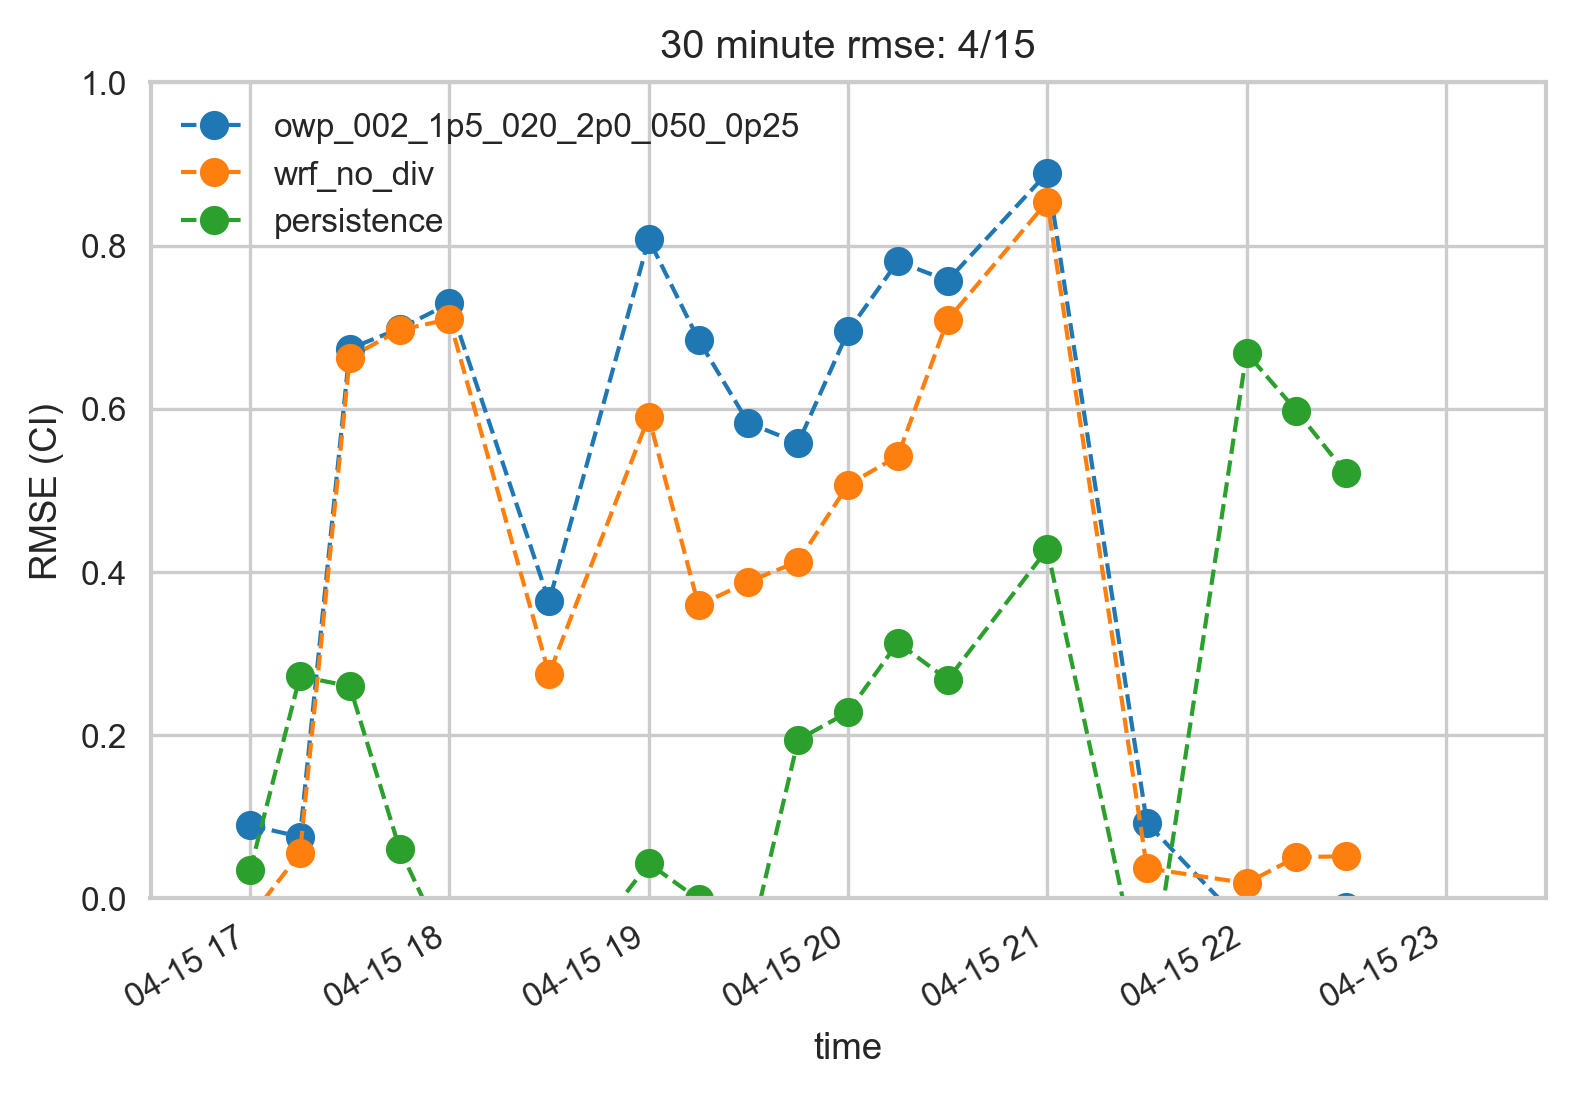

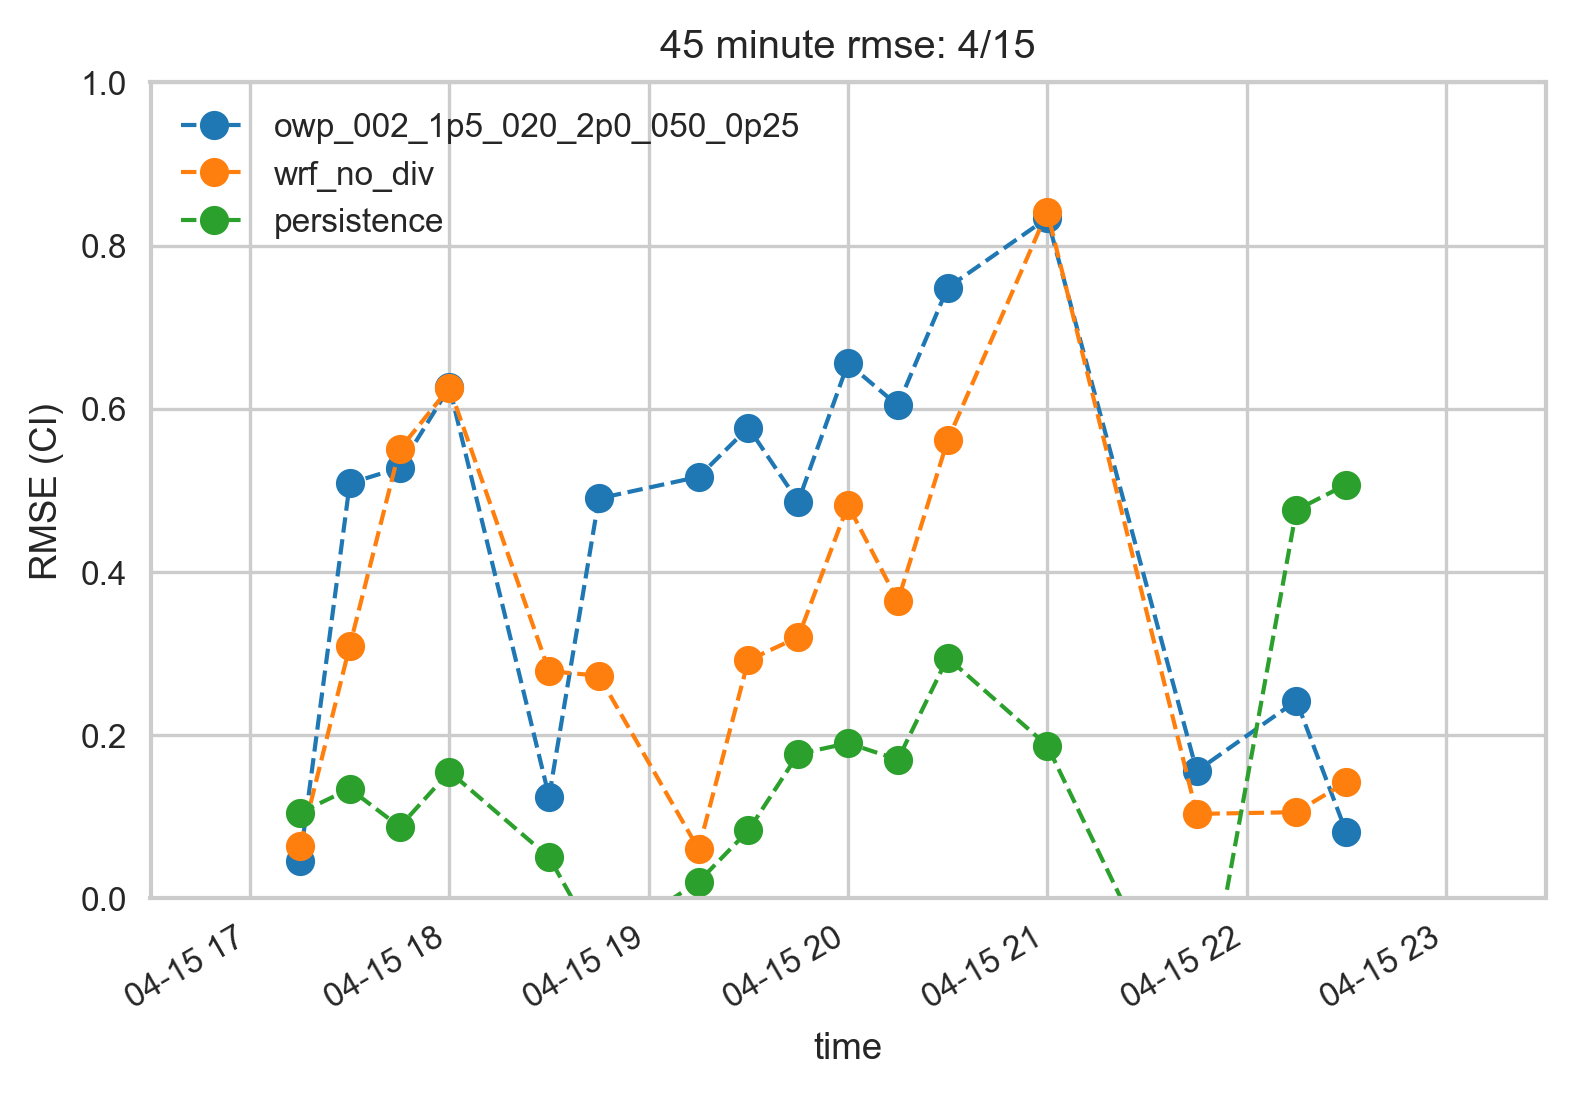

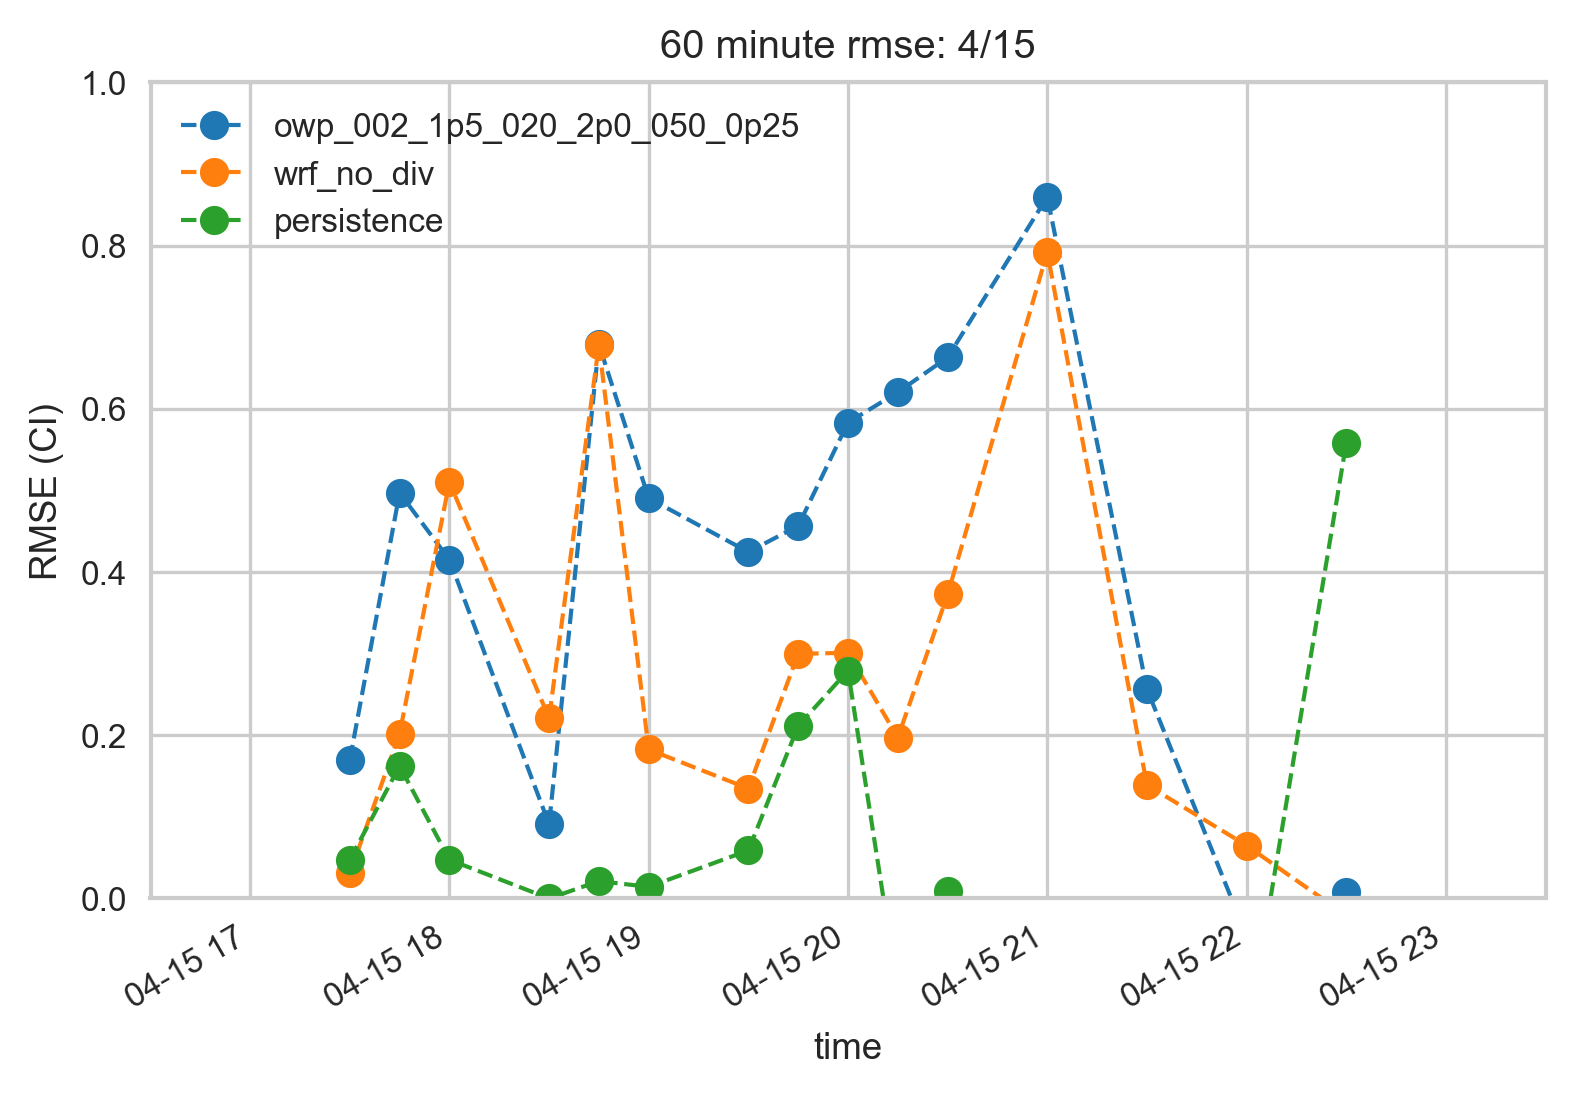

In [144]:
plot_stat(year, month, day, runs, search_paths, 'correlation')